# Object Detection with Yolov8, Tracking with ByteTrack for 30-second video

Get video

In [ ]:
!python --version

Python 3.10.12


In [ ]:
# download 10-second video VIRAT_000001.mp4 from 00:02:10 -to 00:02:20
# there is a car and a few people in this video
# https://drive.google.com/file/d/1ucEKUw4MxPCD-C8Jo9zKz4RlB4xA9rRJ/view?usp=sharing
!gdown "https://drive.google.com/uc?id=1ucEKUw4MxPCD-C8Jo9zKz4RlB4xA9rRJ" -O test.mp4

Downloading...
From: https://drive.google.com/uc?id=1ucEKUw4MxPCD-C8Jo9zKz4RlB4xA9rRJ
To: /content/test.mp4
100% 14.1M/14.1M [00:00<00:00, 76.9MB/s]


### Yolov8

In [ ]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install -q lap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from ultralytics import YOLO
import lap

model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 11.0MB/s]


### Detect with Yolov8</br>Track with `tracker="bytetrack.yaml"`

`results` is a generator object

In [ ]:
!ls

sample_data  test.mp4  yolov8n.pt


In [ ]:
results = model.track(source='/content/test.mp4', conf=0.12, iou=0.5,
                            device=0, save_txt=True, imgsz=1920, classes=[0,1,2], tracker="bytetrack.yaml", stream=True)

In [ ]:
list_results = list(results)


video 1/1 (1/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 62.4ms
video 1/1 (2/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 27.1ms
video 1/1 (3/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 27.2ms
video 1/1 (4/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 27.2ms
video 1/1 (5/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 27.0ms
video 1/1 (6/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 27.3ms
video 1/1 (7/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 25.7ms
video 1/1 (8/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 25.3ms
video 1/1 (9/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 25.2ms
video 1/1 (10/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 25.5ms
video 1/1 (11/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 22.2ms
video 1/1 (12/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 20.9ms
video 1/1 (13/197) /content/test.mp4: 1088x1920 2 persons, 1 car, 20.9ms
video 1/1 (14/197) /content/test.mp4: 1088x1920 2 persons, 

In [ ]:
# Usage
'''
for r in results:
  boxes = r.boxes
  masks = r.masks
  probs = r.probs
'''

'\nfor r in results:\n  boxes = r.boxes\n  masks = r.masks\n  probs = r.probs\n'

In [ ]:
!cat runs/detect/track/labels/test_197.txt

0 0.279973 0.765749 0.0371522 0.135894 2
0 0.19867 0.731107 0.0342133 0.136638 1
0 0.180739 0.695211 0.0194729 0.100872 7
0 0.285402 0.812369 0.0490684 0.231697 8


In [ ]:
list_results[188].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[5.0318e+02, 7.5500e+02, 5.7353e+02, 9.0100e+02, 2.0000e+00, 6.8113e-01, 0.0000e+00],
        [7.4979e+02, 4.1529e+02, 9.4005e+02, 5.9088e+02, 3.0000e+00, 4.0103e-01, 2.0000e+00],
        [3.5046e+02, 7.1763e+02, 4.1203e+02, 8.5985e+02, 1.0000e+00, 7.5614e-01, 0.0000e+00],
        [3.3278e+02, 6.9247e+02, 3.6327e+02, 7.6454e+02, 7.0000e+00, 3.8181e-01, 0.0000e+00]])
cls: tensor([0., 2., 0., 0.])
conf: tensor([0.6811, 0.4010, 0.7561, 0.3818])
data: tensor([[5.0318e+02, 7.5500e+02, 5.7353e+02, 9.0100e+02, 2.0000e+00, 6.8113e-01, 0.0000e+00],
        [7.4979e+02, 4.1529e+02, 9.4005e+02, 5.9088e+02, 3.0000e+00, 4.0103e-01, 2.0000e+00],
        [3.5046e+02, 7.1763e+02, 4.1203e+02, 8.5985e+02, 1.0000e+00, 7.5614e-01, 0.0000e+00],
        [3.3278e+02, 6.9247e+02, 3.6327e+02, 7.6454e+02, 7.0000e+00, 3.8181e-01, 0.0000e+00]])
id: tensor([2., 3., 1., 7.])
is_track: True
orig_shape: (1080, 1920)
shape: torch.Size([4, 7]

.txt files format
- [class, xmid, ymid, w, h, track_id]</br></br>

ultralytics.yolo.engine.results.Boxes attribute formats:
- Boxes.boxes, Boxes.data use [xmin, ymin, xmax, ymax, track_id, conf, class]
- xywh, xywhn use [xmid, ymid, w, h]
- xyxy, xyxyn use [xmin, ymin, xmax, ymax]

Display some results

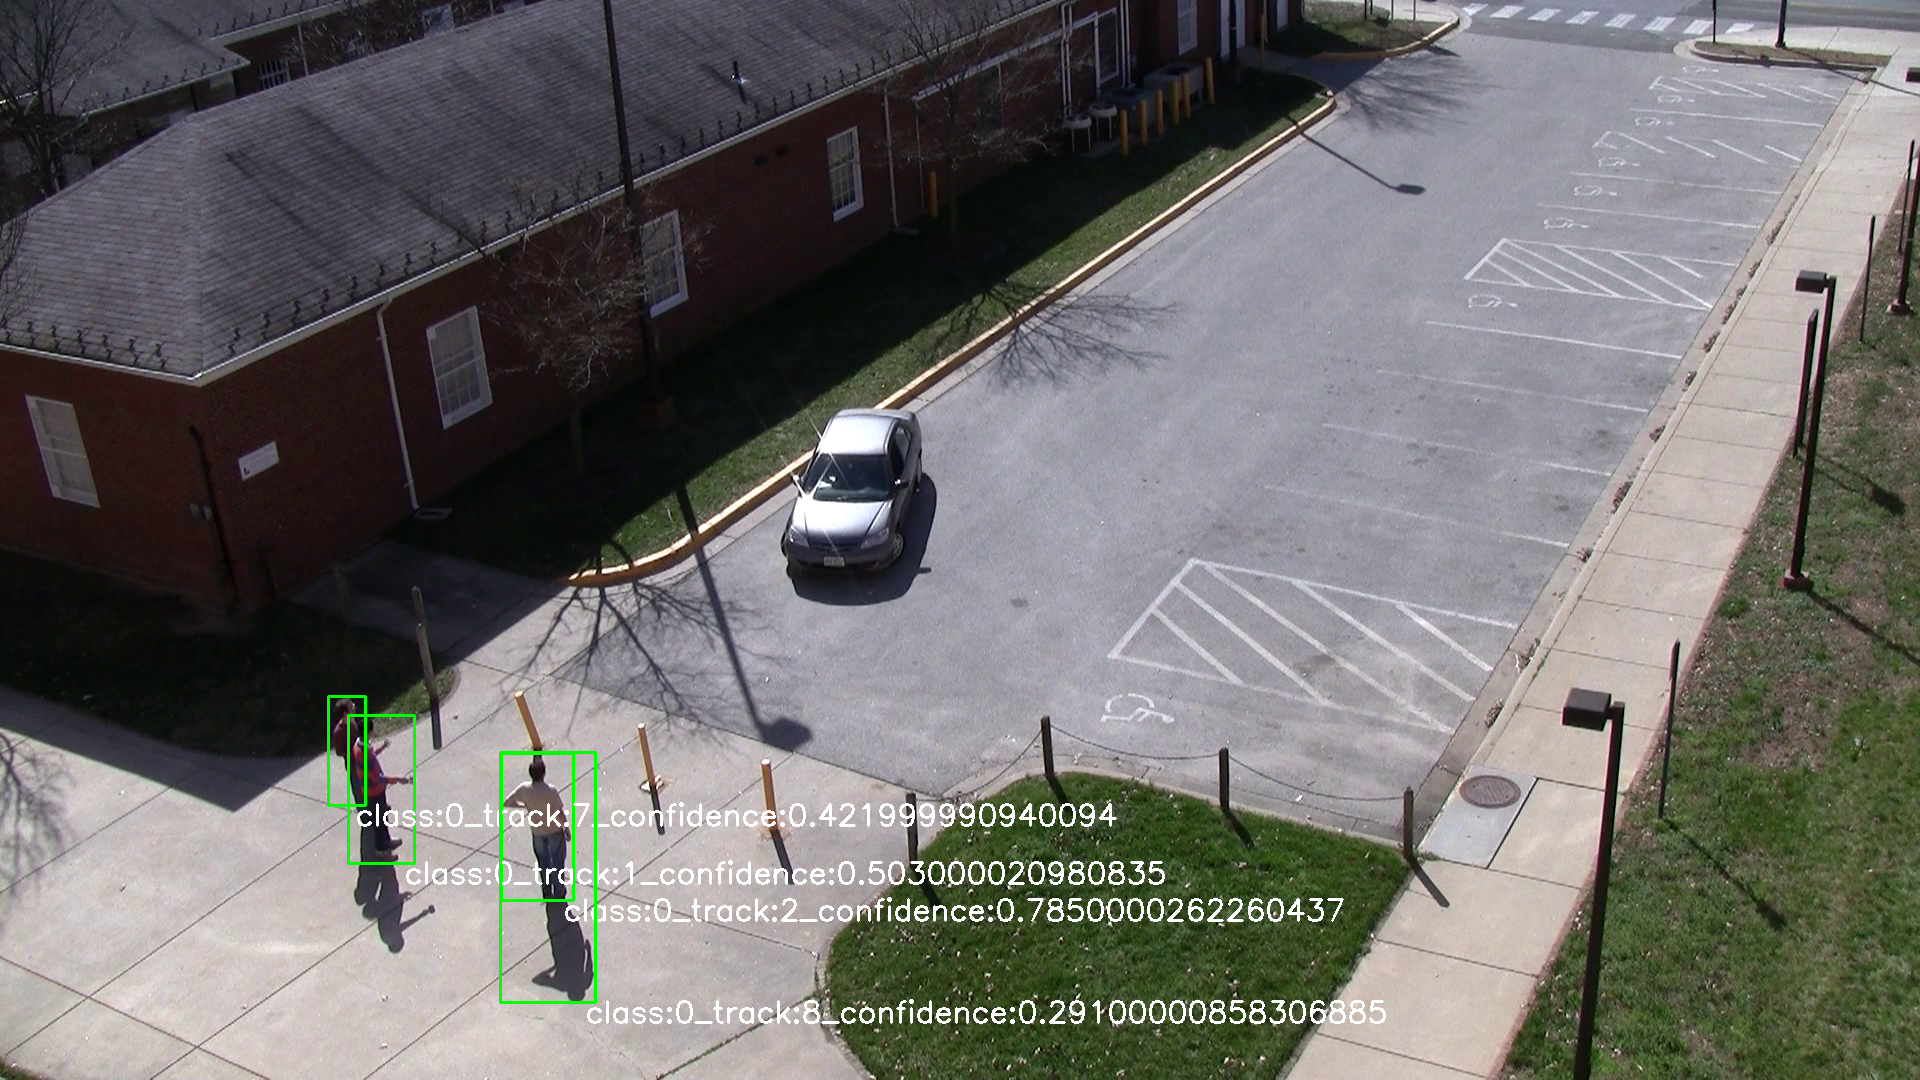

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('/content/test.mp4')

if not cap.isOpened():
  print('error reading video')

cap.set(cv2.CAP_PROP_POS_FRAMES, 196)

success, frame = cap.read()
if not success:
  print('error reading frame')

for detection in list_results[196].boxes.data:
  xmin, ymin, xmax, ymax, track_id, conf, cls = detection.numpy()
  color = (0, 255, 0)  # green
  cv2.rectangle(frame, (int(xmin),int(ymin)), (int(xmax),int(ymax)), color, 2)
  cv2.putText(frame, f'class:{int(cls)}_track:{int(track_id)}_confidence:{round(conf, 3)}', (int(xmax)-10, int(ymax)+20),
              cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

cv2_imshow(frame)
cap.release()
cv2.destroyAllWindows()

Sometimes it's better (below) than others (above)

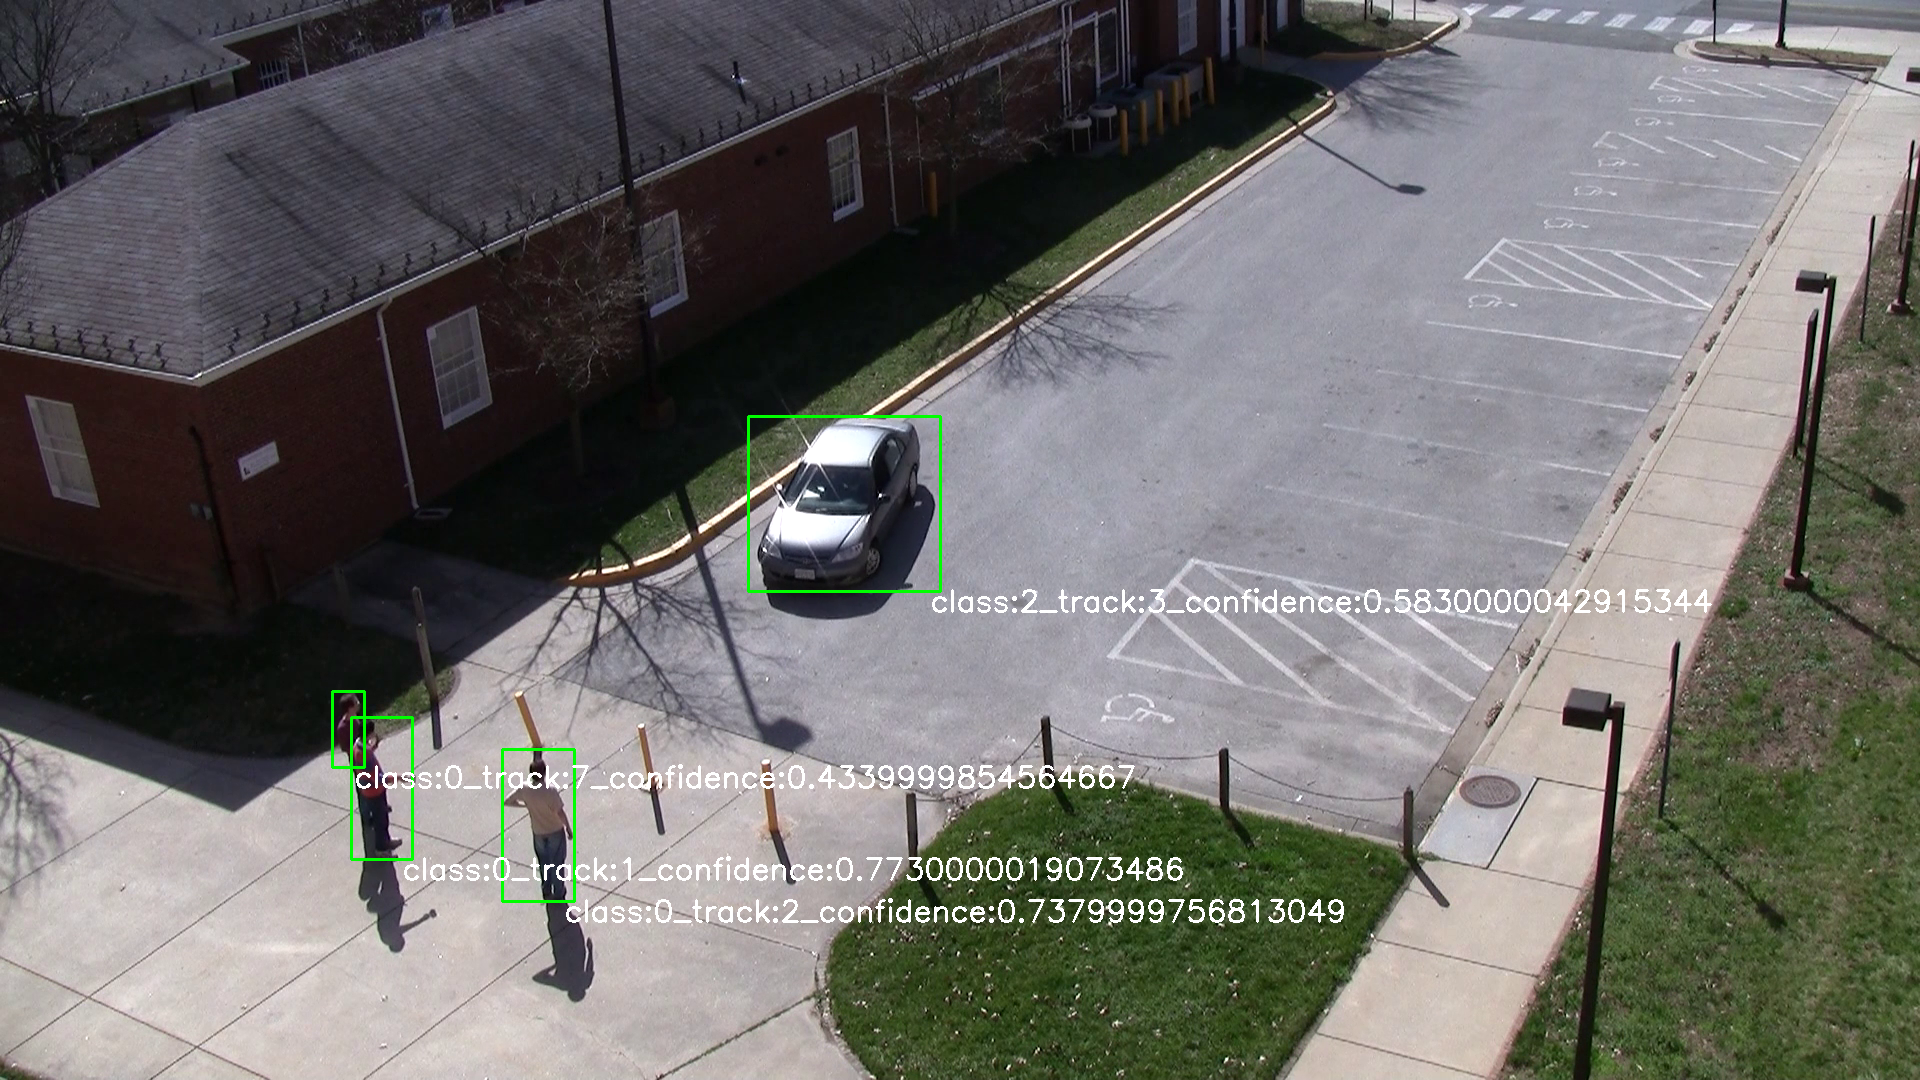

In [ ]:
cap = cv2.VideoCapture('/content/test.mp4')

if not cap.isOpened():
  print('error reading video')

cap.set(cv2.CAP_PROP_POS_FRAMES, 187)

success, frame = cap.read()
if not success:
  print('error reading frame')

for detection in list_results[187].boxes.data:
  xmin, ymin, xmax, ymax, track_id, conf, cls = detection.numpy()
  color = (0, 255, 0)  # green
  cv2.rectangle(frame, (int(xmin),int(ymin)), (int(xmax),int(ymax)), color, 2)
  cv2.putText(frame, f'class:{int(cls)}_track:{int(track_id)}_confidence:{round(conf, 3)}', (int(xmax)-10, int(ymax)+20),
              cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

cv2_imshow(frame)
cv2.waitKey(5000)
cap.release()
cv2.destroyAllWindows()

WINS!:
- getting inference on video with bounding boxes, bounding boxes, and classes

TODOs:
- train yolov8 on some of my data to get better inference. It is sometimes not identifying car. Mistaking shadow for person. Not identifying small occluded person.
- look into the tracker (first discover "bytetracker.yaml" location where tf is it...). Tracker needs to be improved. Horribly wrong as of now... 8 different tracks but only 4 true objects in video.